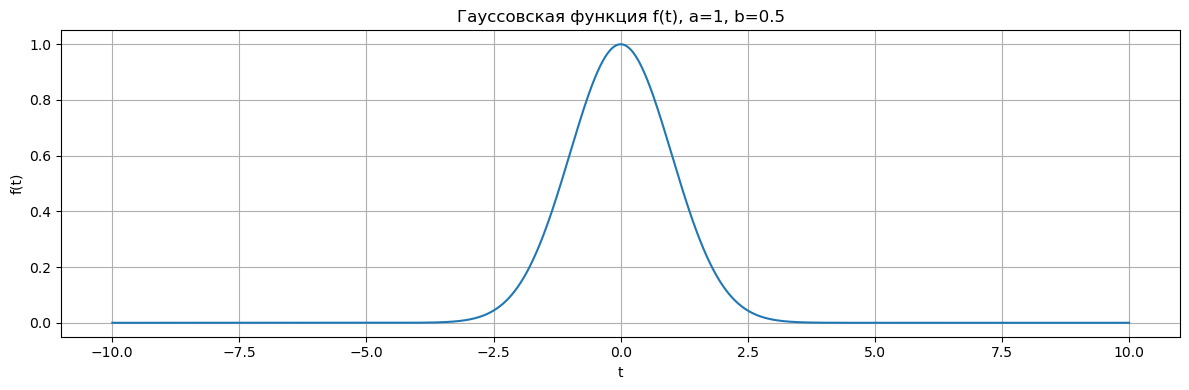

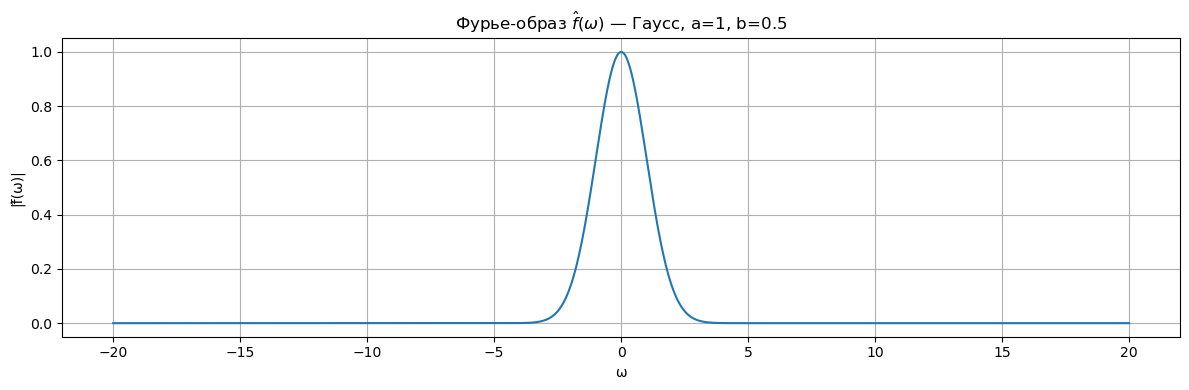

a = 1, b = 0.5
Интеграл |f(t)|^2 dt = 1.7725
Интеграл |f̂(ω)|^2 dω = 1.7725
Разность = 0.0000e+00
----------------------------------------


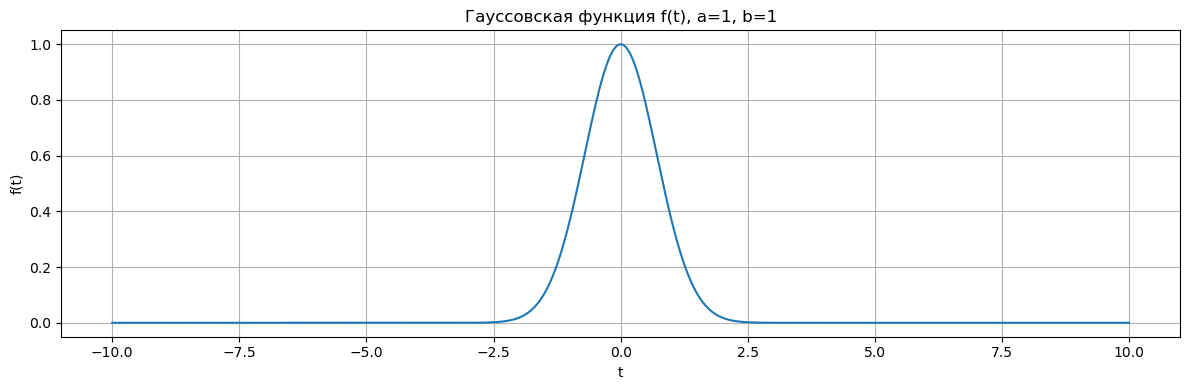

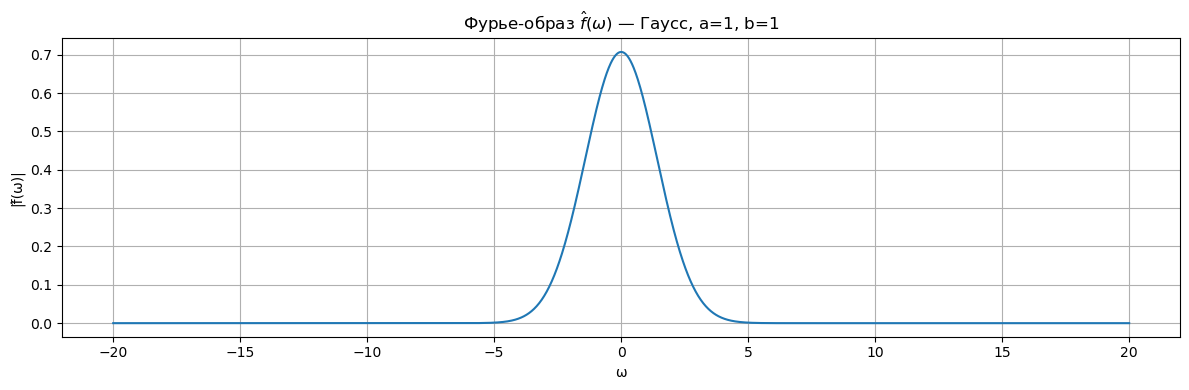

a = 1, b = 1
Интеграл |f(t)|^2 dt = 1.2533
Интеграл |f̂(ω)|^2 dω = 1.2533
Разность = 4.4409e-16
----------------------------------------


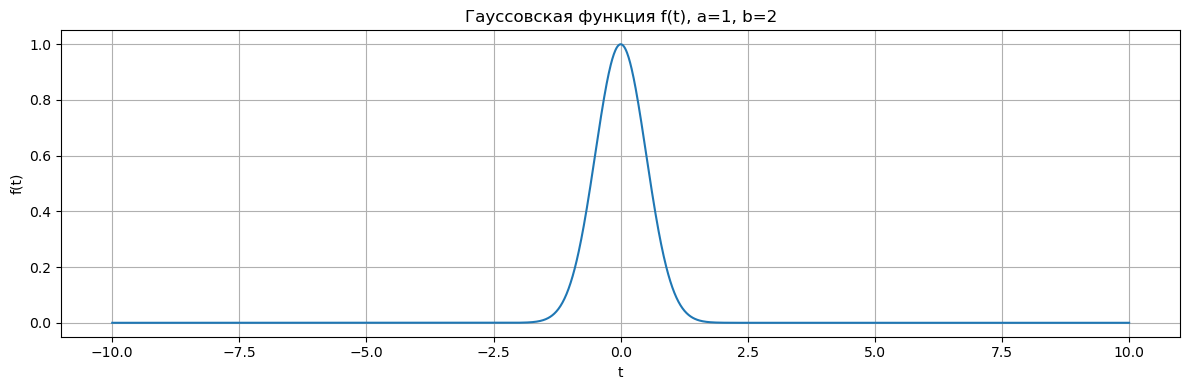

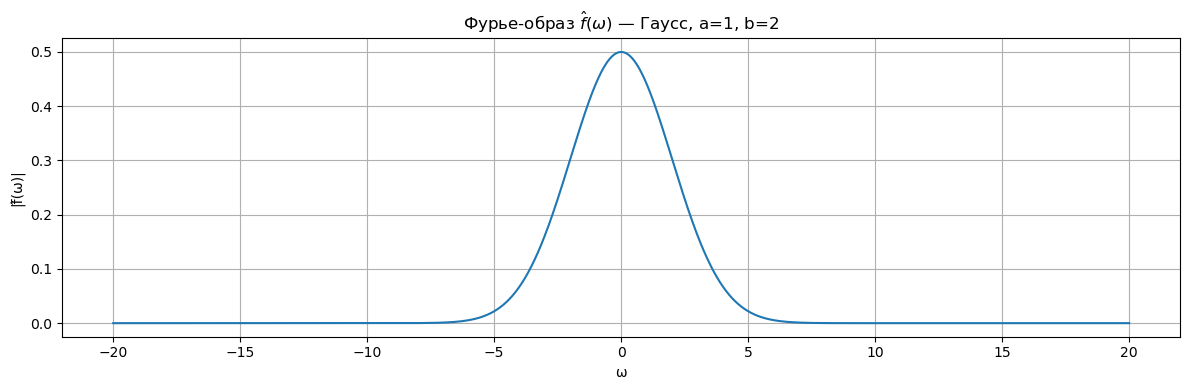

a = 1, b = 2
Интеграл |f(t)|^2 dt = 0.8862
Интеграл |f̂(ω)|^2 dω = 0.8862
Разность = 0.0000e+00
----------------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

def gauss_function(t, a=1, b=1):
    return a * np.exp(-b * t**2)

def fourier_transform_gauss(omega, a=1, b=1):
    return (a / np.sqrt(2 * b)) * np.exp(-omega**2 / (4 * b))

a = 1
b_values = [0.5, 1, 2]

t = np.linspace(-10, 10, 2000)
omega = np.linspace(-20, 20, 2000)

for b in b_values:
    f_t = gauss_function(t, a, b)
    f_omega = fourier_transform_gauss(omega, a, b)

    # f(t)
    plt.figure(figsize=(12, 4))
    plt.plot(t, f_t)
    plt.title(f"Гауссовская функция f(t), a={a}, b={b}")
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"gauss_function_b{b}.png")
    plt.show()

    # f^(ω)
    plt.figure(figsize=(12, 4))
    plt.plot(omega, np.abs(f_omega))
    plt.title(f"Фурье-образ $\\hat{{f}}(\\omega)$ — Гаусс, a={a}, b={b}")
    plt.xlabel("ω")
    plt.ylabel("|f̂(ω)|")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"gauss_spectrum_b{b}.png")
    plt.show()

    # Парсеваль
    lhs = simps(np.abs(f_t)**2, t)
    rhs = simps(np.abs(f_omega)**2, omega)
    print(f"a = {a}, b = {b}")
    print(f"Интеграл |f(t)|^2 dt = {lhs:.4f}")
    print(f"Интеграл |f̂(ω)|^2 dω = {rhs:.4f}")
    print(f"Разность = {abs(lhs - rhs):.4e}")
    print("-" * 40)
